<a href="https://colab.research.google.com/github/Roubish/Stock-Closing-Price-Prediction/blob/main/Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stock Closing Price Prediction using Deep Learning, TensorFlow2 & Keras

## About the Project
Context

This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.

### Acknowledgements
Prices were fetched from Yahoo Finance, fundamentals are from Nasdaq Financials, extended by some fields from EDGAR SEC databases.

Goal

Let us build a model based on GRU to predict the closing price of a stock, say of YAHOO.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

- Load the data from prices-split-adjusted.csv file using pd.read_csv

In [ ]:
df = pd.read_csv('prices-split-adjusted.csv')

- View the top 5 rows of the data stored in df using head().

In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


- Let us have a look at the shape of the data frame. Use shape to view the shape.

In [ ]:
df.shape

(851264, 7)

We could see that there are 851264 rows and 7 columns in the dataset.

- "symbol" column in the dataset represents the symbols of different stocks in the dataset we loaded. Use df.symbol.unique() to view all the unique symbols.

In [ ]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

## Filtering YAHOO data
Let us filter the data related to YAHOO stocks and majorly work on how to predict the closing prices of YAHOO.

#### Note:

head() displays the top 5 rows of the data frame, whereas head(n) displays the top n rows of the data frame.

shape of a data frame returns a tuple with the number of rows and columns of the data frame.

In [ ]:
# Filter the YHOO data from the data frame df, and store the thus obtained YAHOO data in df_yahoo data frame.

df_yahoo = df[df['symbol']=='YHOO']

In [ ]:
#View the top 10 rows from the df_yahoo data frame using head().

df_yahoo.head(10)

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
3053,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
3521,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
3989,2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
4457,2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0
4925,2010-01-15,YHOO,17.250000,16.820000,16.750000,17.250000,18415000.0


In [ ]:
#View the shape of the YAHOO data stored in df_yahoo data frame.

df_yahoo.shape

(1762, 7)

We observe there are 290 rows and 7 columns in this data frame.

## Exploring YAHOO data
Let us explore the data.

- Let us use describe() to view statistical-details about the data.

- Also, let us see if there are any null values in each column of the data using isnull().sum().

#### Note:

- describe() is a method used on a data frame to view the statistical description of the numerical columns in the data frame.

- isnull() method returns True in the places where there are null values(or missing values) and False if the values are not nulls.

- isnull().sum() displays column-wise information about the number of nulls found in each column of the data frame.

In [ ]:
# Use describe method on the df_yahoo data frame to view the statistical description of the numerical columns in the data frame.

df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [ ]:
# Use isnull().sum() on the df_yahoo data frame to view if there are any null values in each column of the data frame.

df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

We see that there are no missing values in the YAHOO dataset, which apparently indicates a good state of our data.

## Setting the Index for the Data Frame

Since we are dealing with time-series data, it makes sense to see the date column as the index of our data frame.

We shall do this by using the set_index method on the df_yahoo data frame.

But before that, let us first convert the "date" column into DateTime type using the pd.to_datetime() method of pandas.

#### Note:

- pd.to_datetime() is used to covert the type of column to datetime type.

- set_index() method is used to set the data frame index using existing columns.

In [ ]:
# Convert the "date" column of the df_yahoo data frame into datetime type using pd.datetime().

df_yahoo['date']= pd.to_datetime(df_yahoo['date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# View the type of "date" column of df_yahoo data frame using dtype.

print(df_yahoo.date.dtype)

datetime64[ns]


Observe the type of the column was previously "object", whereas it is of type "datetime64[ns]".

In [ ]:
#Now, set the "date" column as the index of df_yahoo data frame using the set_index() method.

df_yahoo = df_yahoo.set_index("date")

In [ ]:
#View the top 5 rows of df_yahoo data frame using head() method.

df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


## Setting the Frequency to Business Days
It is very important for a time series to have a frequency set, so as to consolidate that the data we are working on is free of any missing data.

Since we are working with stock-exchange time-series data, it makes sense to set the frequency of the time-series to business days, meaning the data is recorded for weekdays but not any weekends.

Thanks to pandas, there is a readily available method asfreq() to set the frequency for the time-series.

#### Note:

asfreq() method converts the time-series to specified frequency.

We could pass an argument to the method to denote frequency. For example, df.asfreq('d') implies to set the data to a daily frequency. Similarly,

- 'b' means business days

- '30S' means 30 seconds

and so on.

In [ ]:
#First let us again check the shape of df_yahoo.

print(df_yahoo.shape)

(1762, 6)


In [ ]:
# Now, use asfreq('b') on df_yahoo to set the frequency to business days and store it in yahoo_data data frame.

yahoo_data = df_yahoo.asfreq('b')

In [ ]:
# Now let us see if there are any extra rows introduced after setting the frequency.

print(yahoo_data.shape)

(1825, 6)


In [ ]:
# View the last 30 rows of the newly formed yahoo_data using tail().

yahoo_data.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


Observe that there are extra rows and some missing values after setting the frequency to business days.

In [ ]:
# Let us see the column wise null values in yahoo_data using isnull().sum().

yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

## Getting the Dates of Missing Values
Let us see if the missing values are due to the official holidays of NYSE or due to some other unknown factors.

In case the dates are of official holidays, then those values can't be accounted for as missing. Else, we have to come up with ways to fill those missing values.

So first, let us first filter the null rows and get the dates of these missing values.

### Note:

any() returns whether any element is True, potentially over an axis.

isnull().any(axis=1) returns a dataframe which contains null values along the rows.

df.index gets the indices of the data frame.

df.index.tolist() returns the list representation of the indexes of the data frame.

In [ ]:
# Filter the rows with null values using isnull().any(axis=1) on the yahoo_data dataframe, and store the thus obtained dataframe in null_data.

null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]


In [ ]:
# View the head of the null_data data frame using head().

null_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get the list representation of the dates of null_data using index.tolist() and store the list in the null_dates variable.

null_dates = null_data.index.to_list()

## Filtering out the Holidays
Let us check if the dates of missing values fall in any holidays official for NYSE. A quick check at the NYSE official website would help us know the list of official holidays of NYSE.

Now that we know the list of official holidays for NYSE, we use the calendar module and datetime module to check if a given date in the null_dates list is a holiday or not. We do this by:

- Determining if that week or day name of the date in that month is a holiday or not. For example, Washington's Birthday is celebrated on the third Monday of February.
- So we extract the week, day, month, year from a given date in null_dates, and check if the day falls between 15 and 21(the possible day range of third Monday) and if the week is Monday.
- If yes, then it is a holiday. Then we append that date in the holidays list. We took a list of the dates when Good Friday occurs since there is no particular way to determine it.
- Finally, after obtaining the entire list of holidays, we filter out the holidays dates from null_dates and store the non-holiday dates in the list non_holidays.

In [ ]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


## Getting the Modified Data
Let us remove the rows that belong to the holidays using the drop() method on the yahoo_data data frame.

### Note:

drop() metod is used to drop specified labels from rows or columns.

In [ ]:
#Let us first see the shape before dropping the holidays. Use shape to view the shape of yahoo_data.
yahoo_data.shape

(1825, 6)

In [ ]:
# Use drop on the data frame yahoo_data and pass holidays as an argument to the method. Store the thus obtained data in the modified_df data frame.

modified_df = yahoo_data.drop(holidays)

In [ ]:
# Use shape to view the shape of modified_data.

print(modified_df.shape)

(1764, 6)


## Filling the Missing Values
Now that we know that there are two missing values in the data, we have to fill those missing values.

### Note:

Pandas provides some built-in methods to do this job.

- bfill - used to backward fill or use the next valid observation to fill the missing values in the dataset.
- ffill - used to forward fill or use the previous valid observation to fill the missing values in the dataset.
- using fillna(metohd='bfill') is another way of achieving the job using backward filling. Similarly, one could use ffill or any other way like mean().

Let us use bfill() to fill the two missing values.

In [ ]:
# First let us see the number of missing values in each column in modified_data using isna().sum().

print("Before filling missing values:\n",modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [ ]:
# Use bfill method on modified_df and put axis=rows.

modified_df = modified_df.bfill(axis ='rows')

In [ ]:
# Now, let us again check the column-wise null values in modified_df. Now we expect all the values to be 0 as we have filled them.

print("\nAfter filling missing values:\n",modified_df.isna().sum())


After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


## Visualizing YAHOO Data
Now, let us have a look at how the closing values of YAHOO data look like.

Below defined is the plotter function which extracts the close values, reshapes the data into columnar data, and uses that to plots the data.

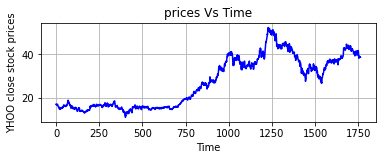

In [ ]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

## Splitting the Data
Let us split the closing_stock into 3 parts, for training, validation, and testing purposes.

Let us have 80% of the data in the train set, 10% in the validation set, and the remaining 10% in the test set.

In [ ]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [ ]:
# Now, slice the closing_stock from 0 till n_train to form the train_data set.

train_data = closing_stock[0:n_train]
print(train_data.shape)

(1411, 1)


In [ ]:
# Similarly, slice the closing_stock from n_train till n_train+n_val to form the val_data, the validation set.

val_data = closing_stock[n_train:n_train + n_val]
print(val_data.shape)

(176, 1)


In [ ]:
# Very similarly, slice the closing_stock from n_train+n_val till the end to form the test_data set.

test_data = closing_stock[n_train + n_val:]
print(test_data.shape)

(177, 1)


## Feature Scaling
Let us then use MinMaxScaler, a module from sklearn library to scale the values into the range of 0 and 1. More about it here

We shall do this feature scaling as follows:

- Use fit_transform to transform features by scaling each feature. We shall do this fitting on the train data train_data.

- Then, use the transform method on the same scaler to transform the values of val_data and test_data.

In [ ]:
# Import MinMaxScaler from sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Get the MinMaxScaler object scaler and put feature_range=(0,1).

scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
# Use fit_transform method of scaler to apply feature scaling on train_data. Store the result in train.

train = scaler.fit_transform(train_data)

In [ ]:
# Use transform method of scaler to apply feature scaling on val_data. Store the result in val.

val = scaler.transform(val_data)

In [ ]:
# Use transform method of scaler to apply feature scaling on test_data. Store the result in test.

test = scaler.transform(test_data)

## Creating the Dataset
In this exercise, we are going to use GRU, which is one of the quite useful deep learning algorithms to deal with time-series data.

It expects the input data to be three-dimensional. The first dimension indicates the batch size, the second dimension is the timestamps and the third dimension is the number of features.

Let us feed 2 values to predict the next value. To create the data set, let us define the create_dataset function.

In the function, we will be traversing till the last third row of the dataset, combine every two consecutive values as one input, and put the third value as the value to be predicted(ground truth of prediction).

In [ ]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Set n_features value to 2.

n_features = 2

In [ ]:
# Pass the train , val and test to create the datasets for each, by passing them as arguments to the create_dataset function.

trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [ ]:
# Let us have a look at the shape of trainX,trainY, valX,valY, testX, testY.

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


- Now, reshape trainX,valX, testX into the required three-dimensional shape, where first argument is the number of rows of that dataset, second argument is 1 and third argument is number of features which is the number of columns of the dataset.

In [ ]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [ ]:
# Now print the shape of trainX,trainY, valX,valY, testX, testY.

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


## Building the Model
Finally, we have reached the modeling part.

As discussed previously, we shall use a GRU based model.

- Firstly, let us import the necessary TensorFlow and Scikit-Learn libraries.

- Next, we shall build the model by adding layers, compiling it, and then fitting the model on the train data.

A bit about the model we are going to build:

- The model we are going to use is a stacked GRU.
- So the output of one GRU layer should act as the input to the next GRU layer stacked above the former one and so on.
- We have already discussed that the GRU/LSTM layers in Keras expect the input to be in three-dimensional.
- Thus, we have to make sure that the output from a previous layer is formatted in a three-dimensional way so as to provide it as input to the next layer.
- This job could be achieved by setting return_sequences=True in the GRU layers whose output would potentially act as the input to the next GRU layer.

In [ ]:
# Import the below libraries.
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
# Initialize model to a sequential model from keras.

model = keras.Sequential()


In [ ]:
# Add the following layers to the model.

# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

Observe the argument return_sequences, which is set to be True only for those layers which have a GRU layer after them(that is, the first and second GRU layers), unlike the third layer. This is so because the output of the third layer would be fed to a Dense layer but not a GRU/LSTM layer.

In [ ]:
# Compile the model as follows, by mentioning the learning rate lr=0.0005, loss='mean_squared_error' and metrics = ['mean_squared_error'].

model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [ ]:
# Let us now see the summary of the model architecture.

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
# Use fit method of the model to start training on the train data. Use validation_data = (valX,valY).

history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Epoch 1/100
11/11 [==============================] - 5s 137ms/step - loss: 0.1559 - mean_squared_error: 0.1559 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 2/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 7.2537e-04 - val_mean_squared_error: 7.2537e-04
Epoch 4/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 4.9766e-04 - val_mean_squared_error: 4.9766e-04
Epoch 6/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 9.8298e-04 - val_mean_squared_error: 9.8298e-04
Epo

## Evaluating the Model Performance
Let us now compute the model score on train data, validation data, and test data.

We shall use the model.evaluate() and print the Mean Squared Error and Root Mean Squared Error for each of the train, validation and test sets.

In [ ]:
# Use the below function to compute the model performance.

import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00018 , RMSE: 0.01
Validation Score:
MSE: 0.00037 , RMSE: 0.02
Test Score:
MSE: 0.00023 , RMSE: 0.02


## Visualizing Loss vs Epochs
Now that we have built the model, let us visualize how the model loss varies with respect to the epoch for the train data and validation data using matplotlib.

- Firstly, let us have a look at the history, where all the history about various parameters like loss, mean_squared_error, and validation mean_squared_error are stored when the model was fit on train data and validated on validation data.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


- Since we aim to plot the training loss an validation loss behavior with respect to the number of epochs, let us use those corresponding values from history.history dictionary.

loss represents the training loss and val_loss indicates the validation loss.

Let us plot the training loss and validation loss. We shall also set the title, ylabel, xlabel, and legend for the plot and finally show it.

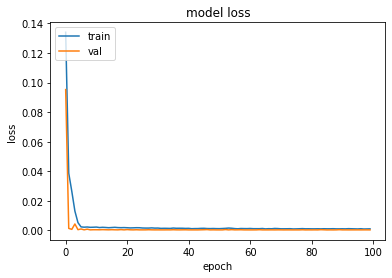

In [ ]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Visualizing Predictions vs Ground Truths
Let us now plot the predicted stock prices vs the actual ground truth values.

We shall use model.predict() to get the predicted values of the test data set.

In [ ]:
# Use predict method on model and pass testX as the argument.

pred = model.predict(testX)

- Since we have scaled the actual values of the dataset, we need to inverse transform the values. So, inverse transform the predicted values using scaler.inverse_transform() and pass the pred as an argument.

In [ ]:
pred = scaler.inverse_transform(pred)
print(pred[:10])

[[37.652534]
 [37.428345]
 [37.271576]
 [37.1284  ]
 [36.84003 ]
 [36.735134]
 [36.691742]
 [36.324455]
 [36.156303]
 [36.77799 ]]


In [ ]:
# Now, reshape the test set and inverse transform the test set values.

testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


- Let us now use pred and testY_actual and visualize their graphs to depict the predicted and actual values with respect to time.

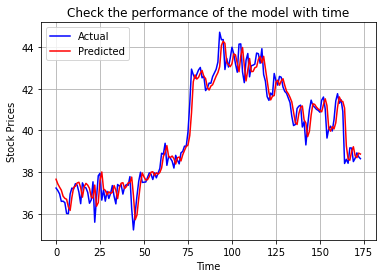

In [ ]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()

# Thank You